ASSIGNMENT-2

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Q1.Dataset: Energy Efficiency Dataset (https://archive.ics.uci.edu/ml/datasets/Energy+efficiency)
The dataset contains 768 samples, each with attributes related to the design of buildings such as wall area, roof area, overall height, glazing area, and orientation. It includes two target variables: the heating load (energy required for heating) and the cooling load (energy required for cooling) of the building. The dataset is relevant for optimizing building energy efficiency and minimizing consumption.
Your objective is to predict the Heating Load of a building based on its physical attributes and architectural design.

In [80]:
df = pd.read_csv("ENB2012_data.csv")
print(df.head())

     X1     X2     X3      X4   X5   X6   X7   X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0  2.0  0.0  0.0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0  3.0  0.0  0.0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0  4.0  0.0  0.0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0  5.0  0.0  0.0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0  2.0  0.0  0.0  20.84  28.28


(i) Perform data pre-processing steps on the dataset. Handle missing values (if any), explore the correlation between variables, and identify any potential outliers.

In [33]:
df.shape

(1296, 10)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    float64
 6   X7      768 non-null    float64
 7   X8      768 non-null    float64
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(10)
memory usage: 101.4 KB


In [35]:
print("Missing values:\n", df.isna().sum())

Missing values:
 X1    528
X2    528
X3    528
X4    528
X5    528
X6    528
X7    528
X8    528
Y1    528
Y2    528
dtype: int64


In [36]:
#handling missing values
df1 = df.dropna()
df1.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

In [37]:
# Correlation matrix
df2 = df1[df1.columns].corr()
print("The Correlation Matrix:\n", df2)

The Correlation Matrix:
               X1            X2            X3            X4            X5  \
X1  1.000000e+00 -9.919015e-01 -2.037817e-01 -8.688234e-01  8.277473e-01   
X2 -9.919015e-01  1.000000e+00  1.955016e-01  8.807195e-01 -8.581477e-01   
X3 -2.037817e-01  1.955016e-01  1.000000e+00 -2.923165e-01  2.809757e-01   
X4 -8.688234e-01  8.807195e-01 -2.923165e-01  1.000000e+00 -9.725122e-01   
X5  8.277473e-01 -8.581477e-01  2.809757e-01 -9.725122e-01  1.000000e+00   
X6  4.678592e-17 -3.459372e-17 -2.429499e-17 -5.830058e-17  4.492205e-17   
X7 -2.960552e-15  3.636925e-15 -8.567455e-17 -1.759011e-15  1.489134e-17   
X8 -7.107006e-16  2.438409e-15  2.067384e-16 -1.078071e-15 -2.920613e-17   
Y1  6.222722e-01 -6.581202e-01  4.556712e-01 -8.618283e-01  8.894307e-01   
Y2  6.343391e-01 -6.729989e-01  4.271170e-01 -8.625466e-01  8.957852e-01   

              X6            X7            X8        Y1        Y2  
X1  4.678592e-17 -2.960552e-15 -7.107006e-16  0.622272  0.634339  
X2 -

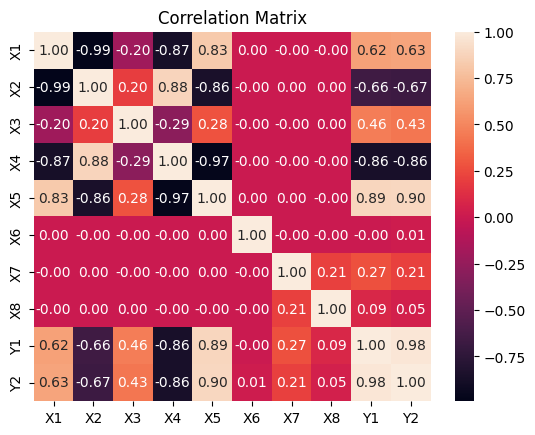

In [38]:
sns.heatmap(df2, annot = True, fmt = ".2f")
plt.title('Correlation Matrix')
plt.show()

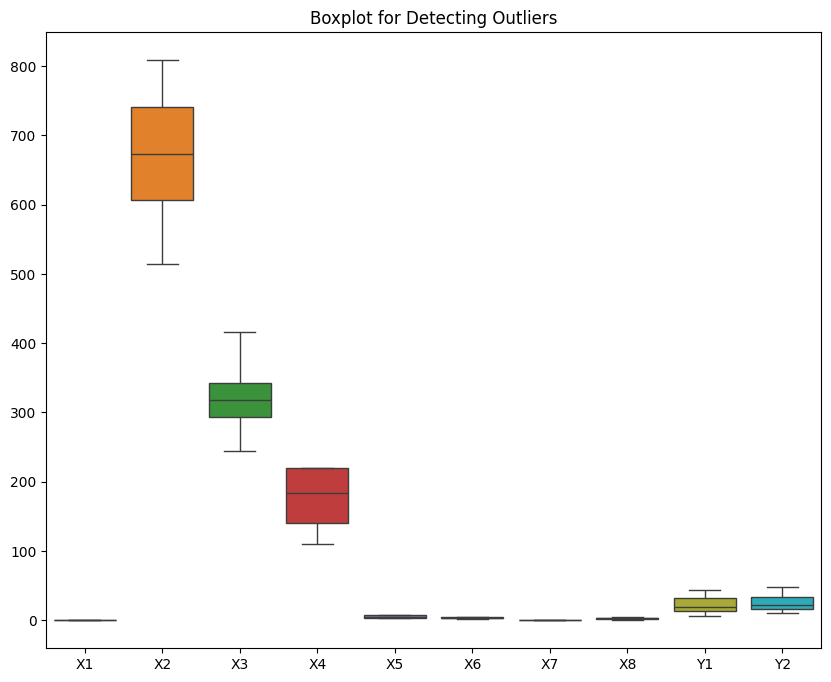

In [39]:
plt.figure(figsize=(10, 8))
sns.boxplot(df1)
plt.title("Boxplot for Detecting Outliers")
plt.show()

In [40]:
# Identifying Outliners wrt Y1

mean = df1["Y1"].mean()
std = df1["Y1"].std()
print("Mean :", mean)
print("Std :", std)

Mean : 22.307200520833334
Std : 10.090195732006158


In [41]:
upper_limit = mean + 3*std
lower_limit = mean - 3*std

df1[(df1["Y1"]<lower_limit) | (df1["Y1"]>upper_limit)]

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2


(ii) Split the dataset into an 80:20 ratio for training and testing using the sklearn library.

In [42]:
from sklearn.model_selection import train_test_split

x = df1.drop(columns=['Y1', 'Y2'])  
y = df1['Y1']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("Training data shape:", x_train.shape) 
print("Test data shape:", x_test.shape)

Training data shape: (614, 8)
Test data shape: (154, 8)


(iii) Train a multivariate linear regression model from scratch using numpy, pandas, and matplotlib. Additionally, train a linear regression model using the sklearn library on the training dataset. Also train ridge and lasso regression model using the sklearn library on the training dataset

(a) Multiple Linear regression from Scratch

In [43]:
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()
x_test = x_test.to_numpy()
y_test = y_test.to_numpy()

In [69]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [70]:
def multilinear_regression(x, y):
    b0 = np.ones(x.shape[0])
    new_x = np.concatenate((b0.reshape(-1,1), x), axis = 1)
    beta = np.linalg.inv(new_x.T @ new_x) @ new_x.T @ y
    return beta

beta = multilinear_regression(x_train_scaled, y_train)
beta

array([ 22.15503257, -14.62267275,  13.1709277 , -11.78059707,
       -28.47254286,   7.21546395,  -0.03593382,   2.70005138,
         0.32734522])

In [71]:
def prediction(x, beta):
    b0 = np.ones(x.shape[0])
    new_x = np.concatenate((b0.reshape(-1,1), x), axis = 1)
    predicted_value = new_x @ beta
    return predicted_value

predicted_y1 = prediction(x_test, beta)
                          
ss_res = np.sum((predicted_y1 - y_test)**2)
ss_tot = np.sum((predicted_y1 - y_test.mean())**2)
R_sq = 1 - (ss_res/ss_tot)
mse = np.mean((predicted_y1 - y_test)**2)
print('R-squared Value =', R_sq)

R-squared Value = 0.08140663480469235


(b) Linear Regression using sklearn Library

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [47]:
linear_regressor = LinearRegression()

linear_regressor.fit(x_train, y_train)
#Predicting
y_pred_linear = linear_regressor.predict(x_test)

#Finding the goodness of fit
mse_linear = mean_squared_error(y_test, y_pred_linear)
R_sq_linear = r2_score(y_test, y_pred_linear)
print('Mean-squared Error =', mse_linear)
print('R-squared Value =', R_sq_linear)

Mean-squared Error = 9.153187855202752
R-squared Value = 0.912184095154691


(b) Ridge Regression using sklearn

In [48]:
from sklearn.linear_model import Ridge

In [49]:
ridge = Ridge(alpha = 0.2)

ridge.fit(x_train, y_train)

y_prediction_ridge = ridge.predict(x_test)

mse_ridge = mean_squared_error(y_test, y_prediction_ridge)
R_sq_ridge = r2_score(y_test, y_prediction_ridge)
print('Mean-squared Error =', mse_ridge)
print('R-squared Value =', R_sq_ridge)

Mean-squared Error = 9.519167793734146
R-squared Value = 0.9086728748054771


(c) Lasso Regression using sklearn

In [50]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.2)

lasso.fit(x_train, y_train)

y_prediction_lasso = lasso.predict(x_test)

mse_lasso = mean_squared_error(y_test, y_prediction_lasso)
R_sq_lasso = r2_score(y_test, y_prediction_lasso)
print('Mean-squared Error =', mse_lasso)
print('R-squared Value =', R_sq_lasso)

Mean-squared Error = 11.562509318034657
R-squared Value = 0.8890690069833557


(iv) Evaluate the performance for each model on the test dataset using following metrics: R2 score, Mean Squared Error (MSE) and Root Mean Squared Error(RMSE). Compare the performance of the manual model and the sklearn model and plot the predicted vs actual values for both models.

               Scratch   sklearn     Ridge     Lasso
Metrics                                             
R2 Score  2.000000e+00  0.912184  0.908673  0.889069
MSE       1.888926e+25  9.153188  9.519168  9.519168
RMSE      4.346178e+12  3.025424  3.085315  3.400369


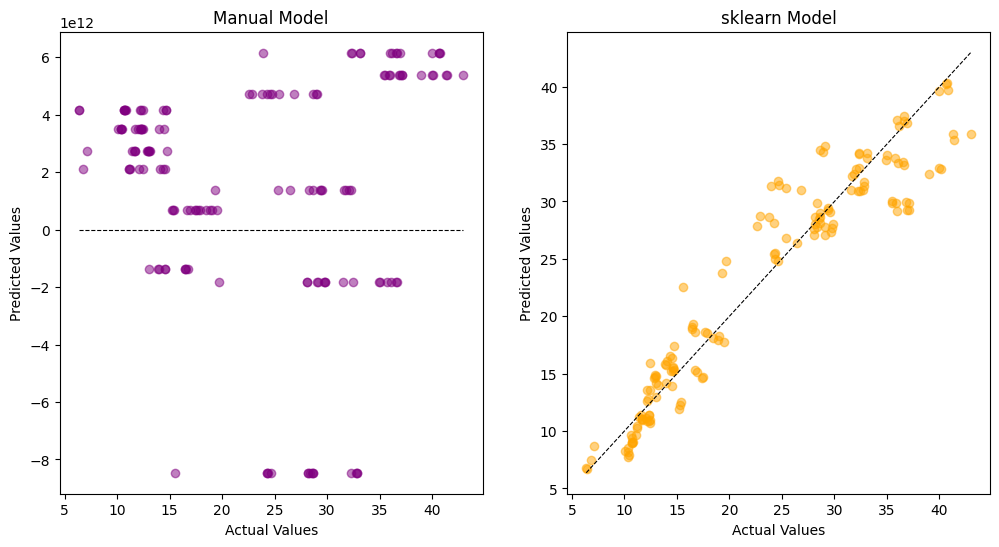

In [51]:
# Metrics Comparison
data = {
    'Metrics' : ['R2 Score', 'MSE', 'RMSE'],
    'Scratch' : [R_sq, mse, (mse)**0.5],
    'sklearn' : [R_sq_linear, mse_linear, (mse_linear)**0.5],
    'Ridge' : [R_sq_ridge, mse_ridge, (mse_ridge)**0.5],
    'Lasso' : [R_sq_lasso, mse_ridge, (mse_lasso)**0.5]
}
df = pd.DataFrame(data)
df = df.set_index('Metrics')
print(df)


plt.figure(figsize=(12, 6))

# Manual Model
plt.subplot(1,2,1)
plt.scatter(y_test, predicted_y1, alpha = 0.5, marker = 'o', color = 'purple')
plt.title('Manual Model')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=0.8)


# sklearn Model
plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_linear, alpha = 0.5, marker = 'o', c='orange')
plt.title('sklearn Model')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=0.8)

(v) Propose energy efficiency improvement suggestions based on the insights from the model results, focusing on building design elements that most significantly impact heating load.

By analyzing the model results, the following energy efficiency improvement suggestions could significantly help reduce heating load:

> Improve insulation in walls and roofs.
> Upgrade windows to energy-efficient, double-glazed models.
> Buildings oriented towards the sun may have higher cooling requirements but could reduce heating needs by utilizing solar energy.
> Enhance the building envelope by sealing doors and windows to prevent heat loss.
> Adopt a compact design to reduce the surface area-to-volume ratio, limiting heat dissipation.